In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils, callbacks
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import visualkeras

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

train_images = tf.pad(train_images[..., tf.newaxis], paddings=[[0,0],[2,2],[2,2],[0,0]]).numpy()
test_images = tf.pad(test_images[..., tf.newaxis], paddings=[[0,0],[2,2],[2,2],[0,0]]).numpy()

train_labels_cat = utils.to_categorical(train_labels, 10)
test_labels_cat = utils.to_categorical(test_labels, 10)


In [2]:
model = models.Sequential([
    layers.Input(shape=(32,32,1)),
    layers.Conv2D(6, kernel_size=5, strides=1, activation='tanh', padding='valid'),
    layers.AveragePooling2D(pool_size=2, strides=2),
    layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'),
    layers.AveragePooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/Users/admin/Documents/TPNS/lab2/.venv/lib/python3.10/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


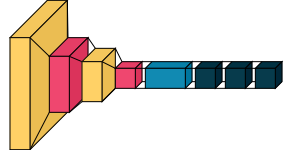

In [3]:
visualkeras.layered_view(model)


In [4]:
log_dir = './logs/lenet'
tb_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    train_images, train_labels_cat,
    batch_size=128,
    epochs=10,
    validation_data=(test_images, test_labels_cat),
    callbacks=[tb_callback],
    verbose=1
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8298 - loss: 0.6018 - val_accuracy: 0.9513 - val_loss: 0.1558
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9600 - loss: 0.1351 - val_accuracy: 0.9698 - val_loss: 0.0954
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9730 - loss: 0.0887 - val_accuracy: 0.9769 - val_loss: 0.0744
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9810 - loss: 0.0633 - val_accuracy: 0.9788 - val_loss: 0.0638
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9841 - loss: 0.0494 - val_accuracy: 0.9814 - val_loss: 0.0625
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9885 - loss: 0.0390 - val_accuracy: 0.9844 - val_loss: 0.0530
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9839 - val_loss: 0.0525
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9928 - loss: 0.0249 - val_accu

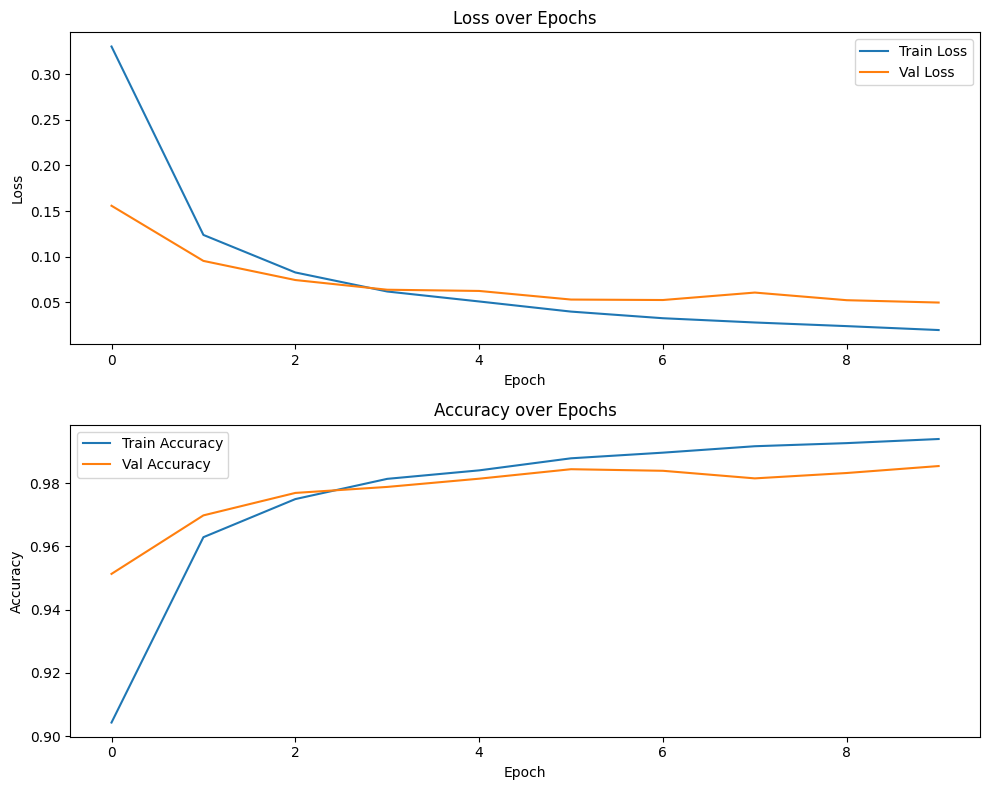

In [5]:
fig, (ax_loss, ax_acc) = plt.subplots(2, 1, figsize=(10, 8))

ax_loss.plot(history.history['loss'], label='Train Loss')
ax_loss.plot(history.history['val_loss'], label='Val Loss')
ax_loss.set_title('Loss over Epochs')
ax_loss.set_xlabel('Epoch')
ax_loss.set_ylabel('Loss')
ax_loss.legend()

ax_acc.plot(history.history['accuracy'], label='Train Accuracy')
ax_acc.plot(history.history['val_accuracy'], label='Val Accuracy')
ax_acc.set_title('Accuracy over Epochs')
ax_acc.set_xlabel('Epoch')
ax_acc.set_ylabel('Accuracy')
ax_acc.legend()

plt.tight_layout()
plt.show()


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')


Test accuracy: 0.9854


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


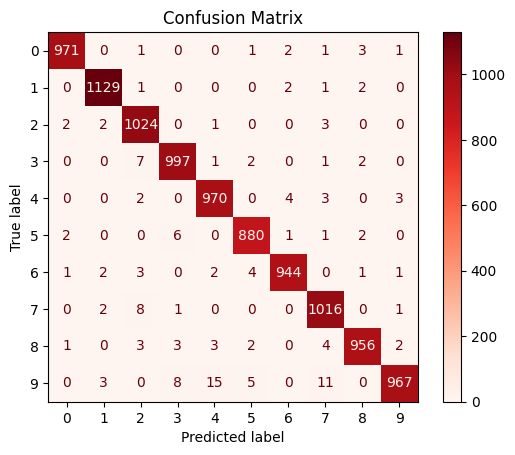

In [7]:
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()
